<a href="https://colab.research.google.com/github/sime1/notebooks/blob/master/polynomial_ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Ridge Regression

In questo notebook viene applicato il modello di regressione Ridge, che cerca di
favorire coefficienti più piccoli. La documentazione relativa a questo modello
fornita da `scikit-learn` può essere trovata a [questo indirizzo](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression).

Per rendere la regressione polinomiale, ho utilizzato
`sklearn.preprocessing.PolynomialFeatures`. Date le dimensioni del dataset, ho utilizzato polinomi fino al terzo grado.

## Diabetes Dataset

Il dataset al quale ho applicato il modello è uno di quelli forniti da `scikit-learn`, [Diabetes](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes). Ho utilizzato il metodo `train_test_split` per dividere il dataset in due dataset, uno per il training e l'altro per la validazione.

Ho utilizzato un valore costatne per il parametro `random_state` in modo da rendere verificabili e ripetibili i risultati ottenuti.


In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = load_diabetes()
print("Dataset size: {}".format(dataset.data.shape))

df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=1)

display(df.head())

Dataset size: (442, 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


## Variazione di α

Dopo aver caricato i dati, ho provato a variare il valore di alfa per vedere come
variano i pesi calcolati. Ho preso spunto dal codice di [questo esempio](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html) per generare i diversi alfa, raccogliendo poi i dati relativi al valore di alfa,
score del modello e valore dei pesi in un dataframe.

Quando 


degree: 1


,alpha,test score,validation score,norm
0,0.000100,0.533228,0.438315,1166.040982
1,0.000170,0.533228,0.438231,1161.002354
2,0.000291,0.533225,0.438092,1152.700723
3,0.000495,0.533220,0.437863,1139.333154
4,0.000844,0.533205,0.437496,1118.598602
5,0.001438,0.533170,0.436935,1088.288308
6,0.002452,0.533093,0.436128,1047.783964
7,0.004179,0.532945,0.435080,1000.093503
8,0.007122,0.532706,0.433904,952.228313
9,0.012140,0.532377,0.432828,911.517375


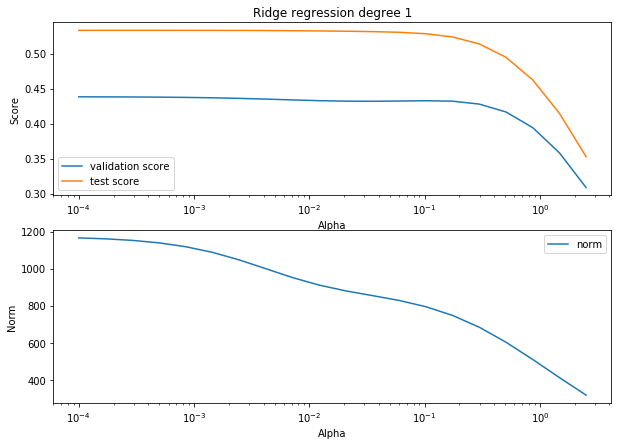

min score: 0.3087509636587141, max score: 0.438314793699919 [delta 0.12956383004120492]

degree: 2


,alpha,test score,validation score,norm
0,0.000100,0.616515,0.292826,12692.186509
1,0.000170,0.614071,0.306106,11003.670437
2,0.000291,0.610624,0.323978,9379.974065
3,0.000495,0.605795,0.345563,7794.519946
4,0.000844,0.599348,0.368238,6273.848139
5,0.001438,0.591454,0.388806,4891.101472
6,0.002452,0.582718,0.405066,3722.171573
7,0.004179,0.573847,0.416464,2799.443510
8,0.007122,0.565298,0.423639,2104.578185
9,0.012140,0.557304,0.427704,1599.215756


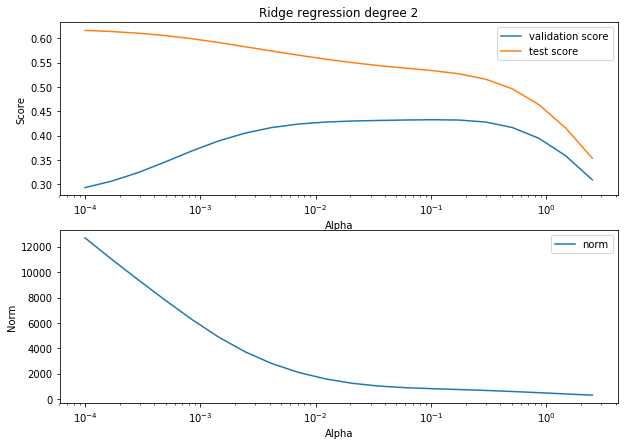

min score: 0.29282631025899675, max score: 0.4325129805098189 [delta 0.13968667025082215]

degree: 3


,alpha,test score,validation score,norm
0,0.000100,0.625959,0.291842,15641.117509
1,0.000170,0.620566,0.305594,12445.522234
2,0.000291,0.615067,0.323636,10072.347311
3,0.000495,0.608846,0.345197,8131.252469
4,0.000844,0.601461,0.367798,6443.633102
5,0.001438,0.592930,0.388337,4980.681793
6,0.002452,0.583754,0.404637,3771.285751
7,0.004179,0.574572,0.416117,2826.913162
8,0.007122,0.565801,0.423381,2119.925313
9,0.012140,0.557647,0.427524,1607.583685


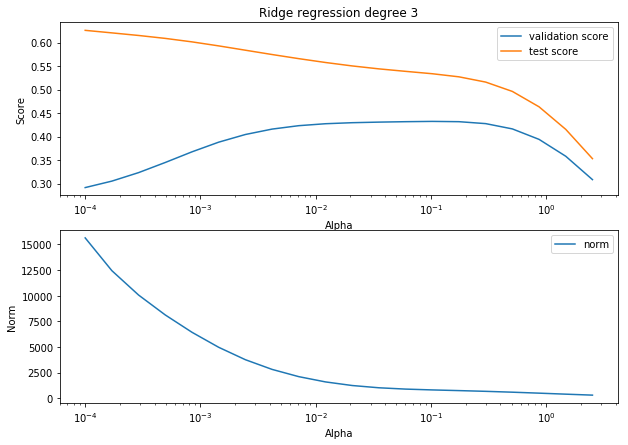

min score: 0.29184182921166313, max score: 0.4324789324797761 [delta 0.14063710326811296]



In [2]:
alphas = [*np.logspace(-4, 0.4, 20)]

for degree in range(1,4):
  results = []
  print("degree: {}".format(degree))
  for alpha in alphas:
    model = make_pipeline(
      PolynomialFeatures(degree=degree),
      Ridge(alpha=alpha)
    )
    model.fit(x_train, y_train)
    results.append([alpha, model.score(x_train, y_train), model.score(x_test, y_test), *model.named_steps["ridge"].coef_])

  res_df = pd.DataFrame(data=results, columns=["alpha", "test score", "validation score", *["w {}".format(i) for i in range(len(results[0])-3)]])
  res_df["norm"] = np.linalg.norm(res_df.values,axis=1)
  display(res_df[["alpha", "test score", "validation score", "norm"]])
  
  plt.figure(figsize=(10,7))

  # plot score vs alpha 
  ax = plt.subplot(211)
  plt.title("Ridge regression degree {}".format(degree))
  plt.xlabel("Alpha")
  plt.ylabel("Score")
  plt.xscale("log")
  plt.plot(res_df["alpha"], res_df["validation score"])
  plt.plot(res_df["alpha"], res_df["test score"])
  ax.legend()

  # plot norm vs alfa
  ax = plt.subplot(212)
  plt.xlabel("Alpha")
  plt.ylabel("Norm")
  plt.xscale("log")
  plt.plot(res_df["alpha"], res_df["norm"])
  ax.legend()

  plt.show()

  min_score = res_df["validation score"].min()
  max_score = res_df["validation score"].max()
  print("min score: {}, max score: {} [delta {}]\n".format(min_score, max_score, max_score - min_score ))

## Osservazioni sui risultati

* l'utilizzo di alfa crea più vantaggi in regressioni che utilizzano polinomi
  di grado maggiore
* aumentare il valore di alfa migliora la performance del modello fino ad un
  certo punto, superato il quale comincia a peggiorare sia sui dati di training
  che sui dati di valutazione (underfitting)
* l'effetto della penalità dovuta ad alfa si nota subito guardando come varia
  il valore della norma dei coefficienti
* senza alfa, aumentare il grado del polinomio può peggiorare la performance;
  utilizzando alfa questo problema viene mitigato